In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import os

In [ ]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

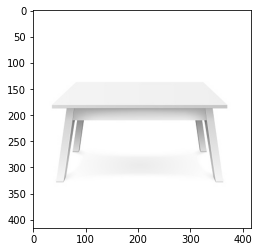

In [ ]:
i = cv2.imread('/content/1.jpg')
plt.imshow(i)

In [ ]:
'''
1---[130:330, 30:370, :]
2---[25:580, 20:600, :]
3---[8:203, 33:200, :]
4---
5---[400:1000, 300:1100, :]
6---[55:115, 20:100, :]
7---[55:202, 78:145,:]
8---[78:360, 65:545,:]
9---[12:265, 65:165, :]
10---[12:265, 65:165, :]
11---[55:540, 120:480]
'''

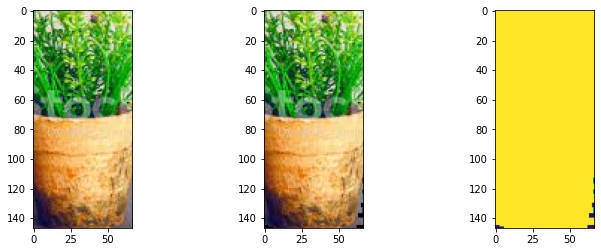

(229, 220, 3)

In [ ]:
def process(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_canny = cv2.Canny(img_gray, 0, 50)
    img_dilate = cv2.dilate(img_canny, None, iterations=1)
    img_erode = cv2.erode(img_dilate, None, iterations=1)
    return img_erode

def get_masked(img):
    h, w, _ = img.shape
    center = h // 2, w // 2
    contours, _ = cv2.findContours(process(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        if cv2.contourArea(cnt) > 100:
            if cv2.pointPolygonTest(cnt, center, False) > 0:
                mask = np.zeros((h, w), 'uint8')
                cv2.drawContours(mask, [cnt], -1, 255, -1)
                m = mask
                return cv2.bitwise_and(img, img, mask=mask), m

p = "/content/7.jpg"
i = cv2.imread(p)[:,:,::-1]
f, m = get_masked(i)
plt.figure(figsize=(20,4))
plt.subplot(1,5,1),plt.imshow(i[55:202, 78:145,:])
plt.subplot(1,5,2),plt.imshow(f[55:202, 78:145,:])
plt.subplot(1,5,3),plt.imshow(m[55:202, 78:145])
plt.show()

#m = image_resize(m, width = 30)
#i = image_resize(i, width = 30)
cv2.imwrite('mask.jpg', m)
#cv2.imwrite('i1.jpg', i)
i.shape

(21, 10, 3)
11 22


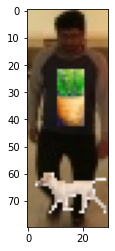

In [ ]:
s_img = cv2.imread(p)[:,:,::-1]
s_img=s_img[55:202, 78:145,:]
s_img = image_resize(s_img, width = 10)
#s_img = image_resize(s_img, height = 30)
#plt.imshow(s_img)
l_img = fu.copy()#cv2.imread("/content/drive/MyDrive/Dataset/f/00000007_01_0023.jpg")[:,:,::-1]
mask   = cv2.imread('/content/mask.jpg')
mask=mask[55:202, 78:145]
mask = image_resize(mask, width = 10)
#mask = image_resize(mask, height = 30)
kernel = np.ones((2,2),np.uint8)
mask = cv2.erode(mask, kernel,iterations = 1)

print(mask.shape)

#l_img[mask>0]=0 
y_offset=random.choice(range(10,40))
x_offset=random.choice(range(10, 15))
print(x_offset,y_offset)
l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]][mask>0] = 0

l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] += s_img*(mask>0)

plt.imshow(l_img)


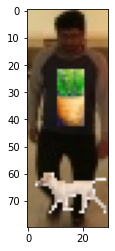

In [ ]:
fu=l_img.copy()
plt.imshow(fu)

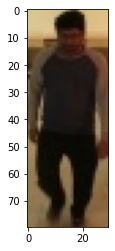

In [ ]:
te=cv2.imread("/content/drive/MyDrive/Dataset/f/00000007_01_0023.jpg")[:,:,::-1]
plt.imshow(te)

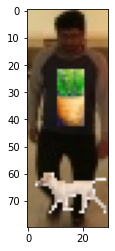

In [ ]:
plt.imshow(fu)

In [ ]:
v = np.array([te, fu])
o.append(v)

In [ ]:
id=np.array(o)

In [ ]:
id.shape

(5, 2, 80, 30, 3)

In [ ]:
np.save('/content/drive/MyDrive/Dataset/f/final.npy', id)

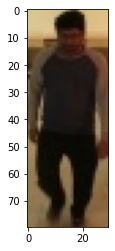

In [ ]:
plt.imshow((np.array(o))[4][0])

In [ ]:
lis = os.listdir('/content/drive/MyDrive/Dataset/N/partial_dataset/PartialiLIDS/gallery')
lis = np.array(lis)
#np.random.shuffle(lis)
lis.sort()
len(lis)

119

In [ ]:
l = lis[:50]
data=[]
c=0
for i in l:
    image = cv2.imread("/content/drive/MyDrive/Dataset/N/partial_dataset/PartialiLIDS/gallery/"+ i)
    c+=1
    print(c)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    re = cv2.resize(image, (30, 80), interpolation = cv2.INTER_AREA)
    re = cv2.cvtColor(re,cv2.COLOR_BGR2RGB)
    #plt.figure(figsize=(20,4))
    #plt.subplot(1,4,1),plt.imshow(image)
    #plt.subplot(1,4,2),plt.imshow(re)
    #plt.show()
    #path = '/content/drive/MyDrive/Dataset/Pre_data_fcase'
    #cv2.imwrite(os.path.join(path , i), cv2.cvtColor(re,cv2.COLOR_BGR2RGB))
    data.append(re)

data=np.array(data)
data.shape

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


(50, 80, 30, 3)

In [ ]:
d=np.load('/content/drive/MyDrive/Dataset/N/ed-data.npy')

In [ ]:
d=data

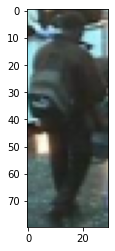

In [ ]:
plt.imshow(d[0])

In [ ]:
#np.random.shuffle(d)

In [ ]:
ooo = []
c=0

In [ ]:
c

0

1


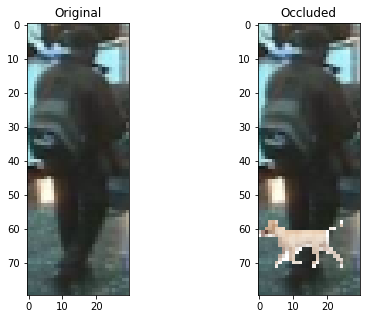

2


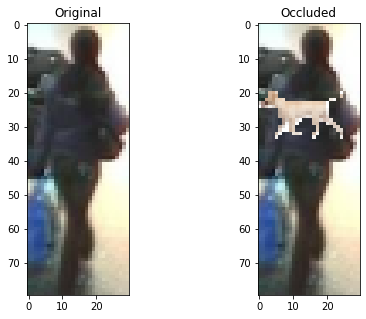

3


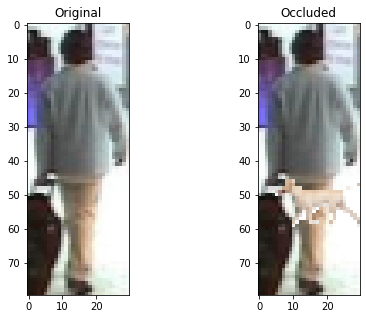

4


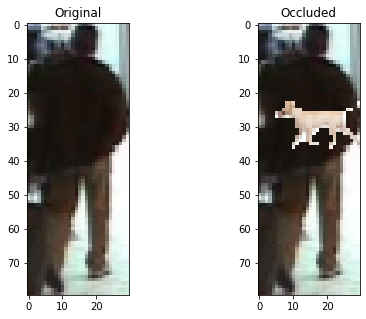

5


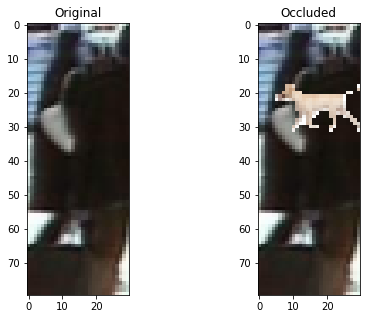

6


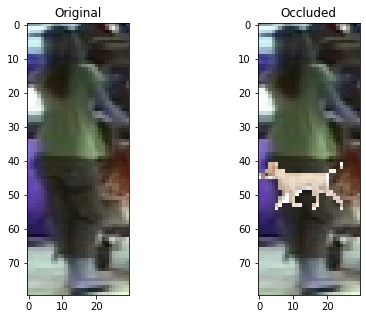

7


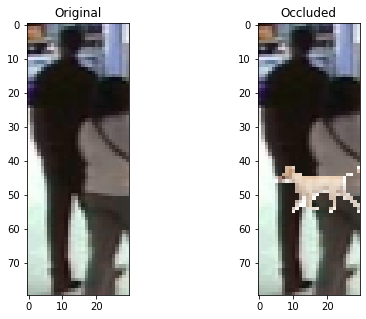

8


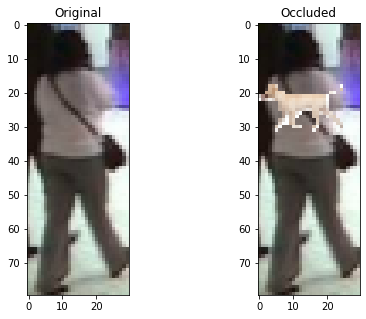

9


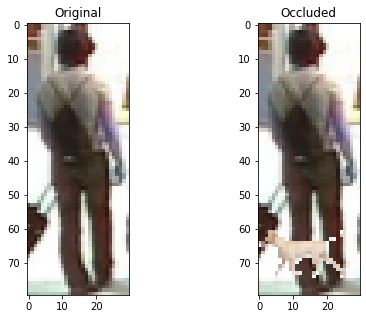

10


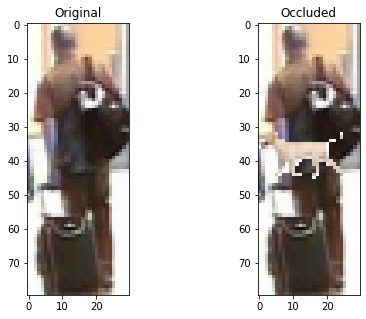

11


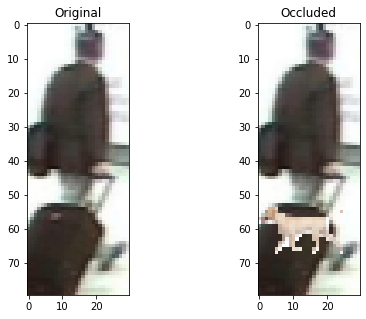

12


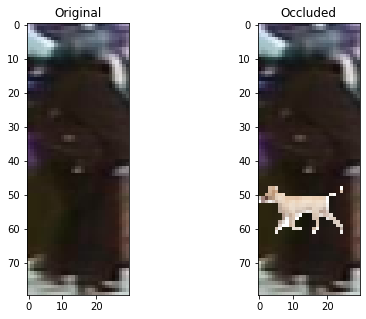

13


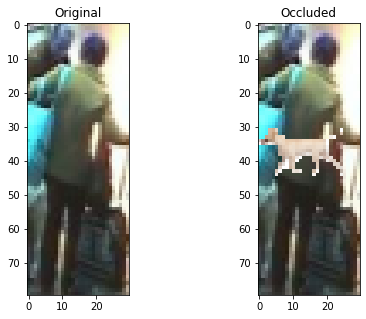

14


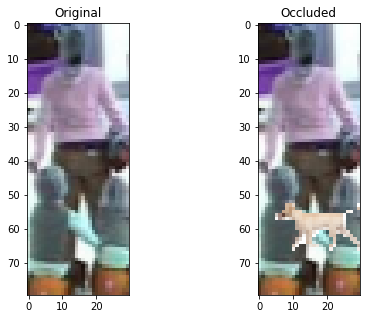

15


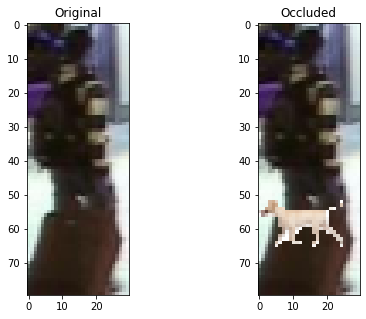

16


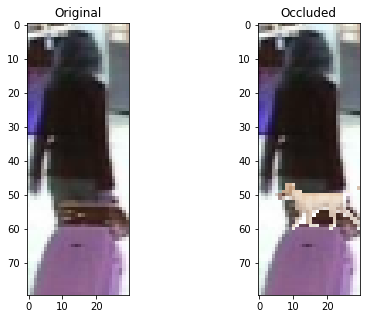

17


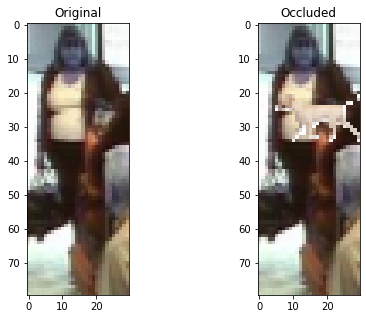

18


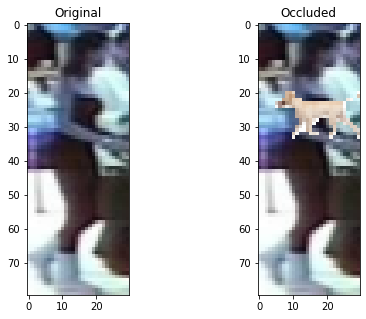

19


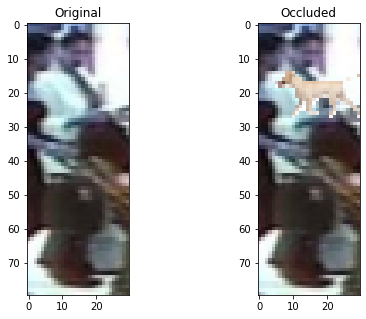

20


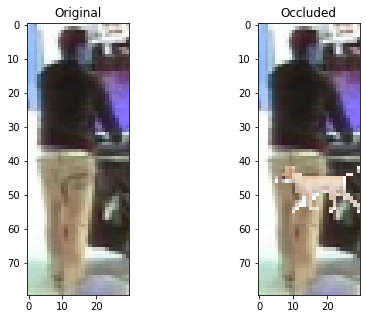

21


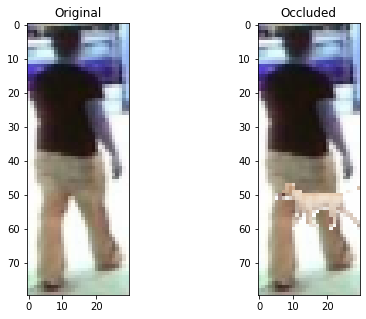

22


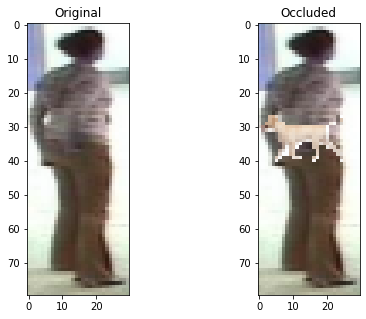

23


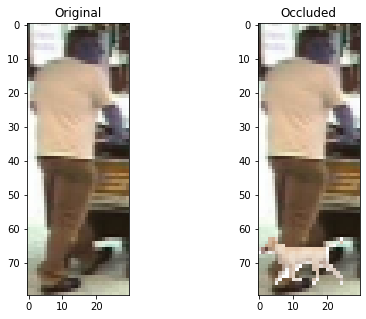

24


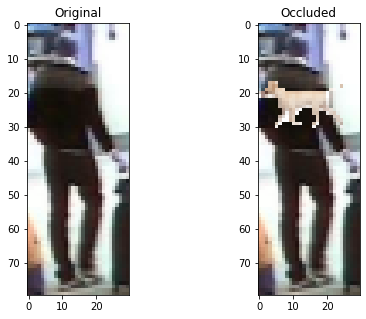

25


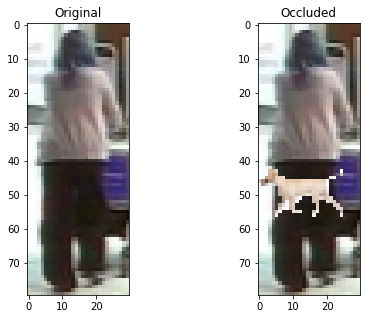

26


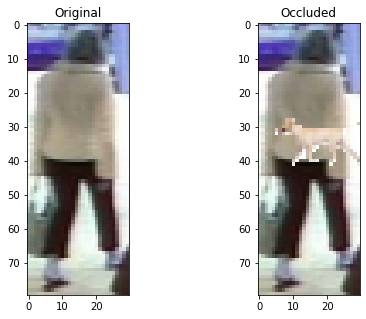

27


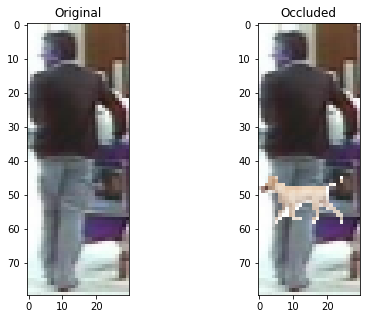

28


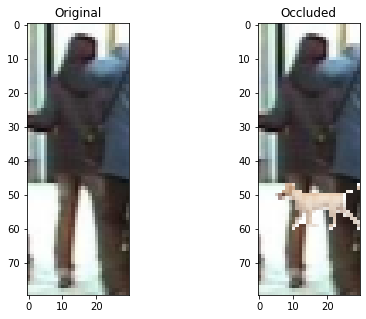

29


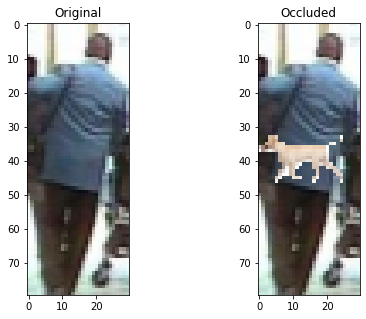

30


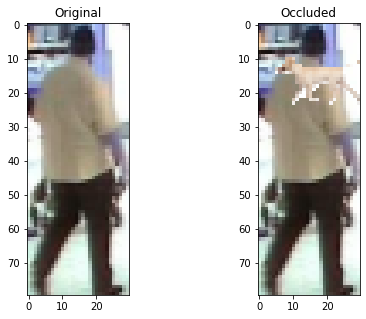

31


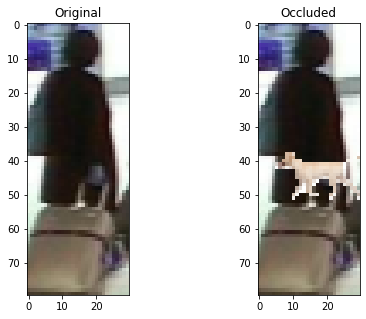

32


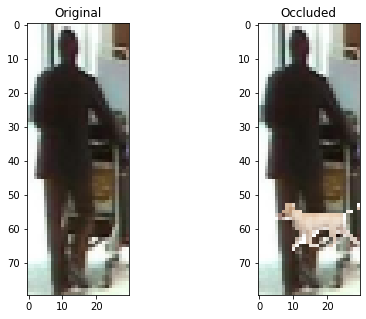

33


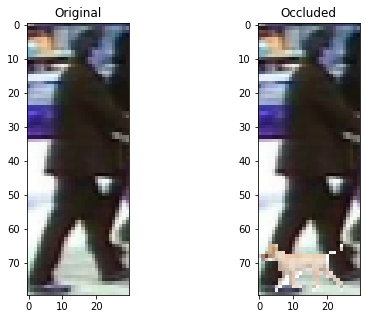

34


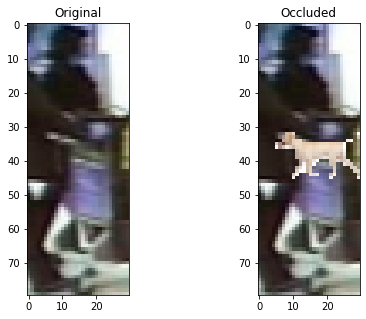

35


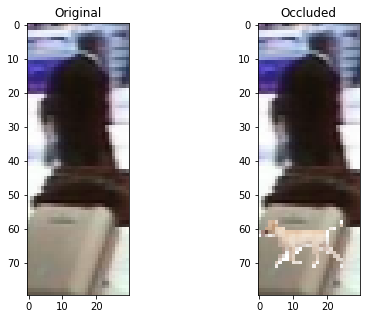

36


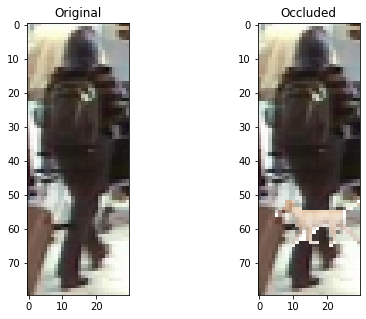

37


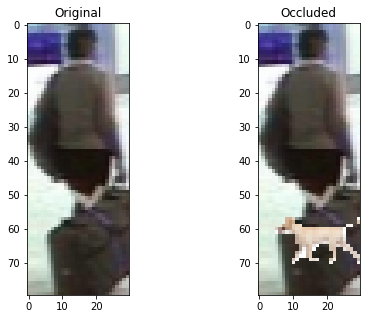

38


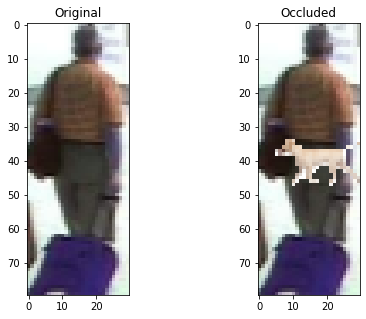

39


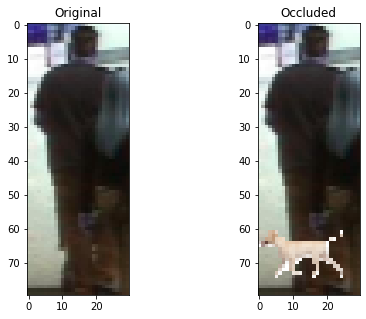

40


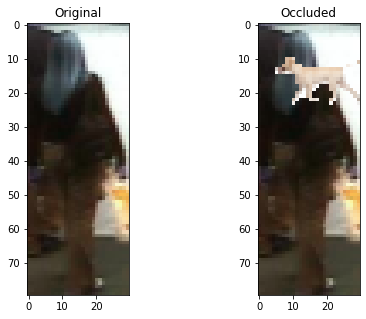

41


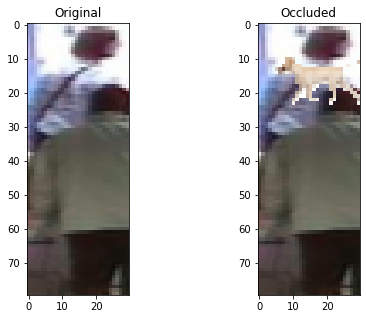

42


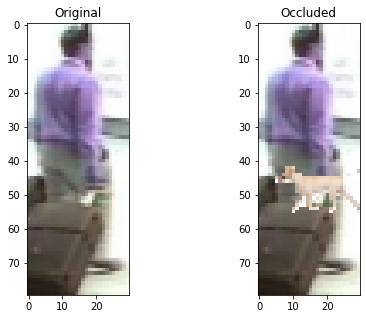

43


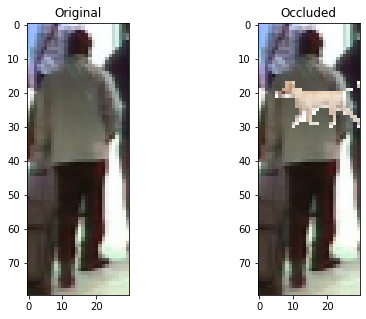

44


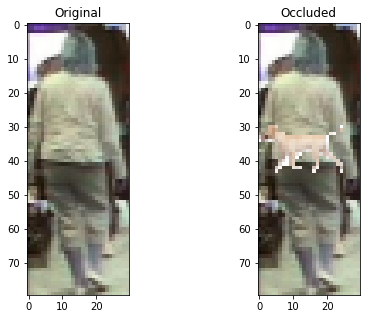

45


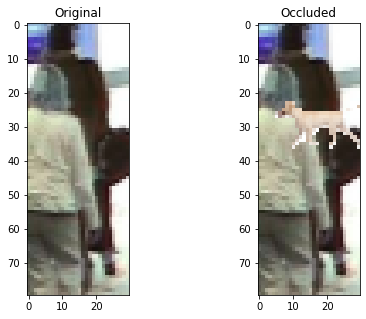

46


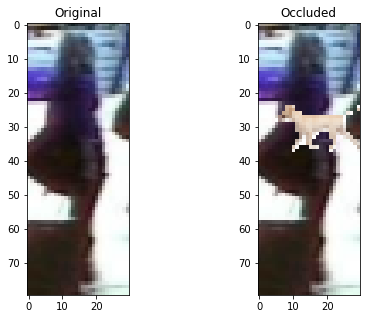

47


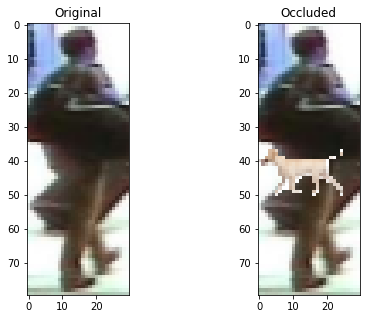

48


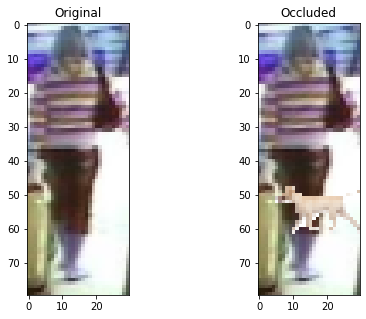

49


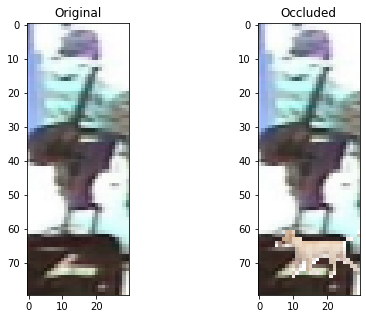

50


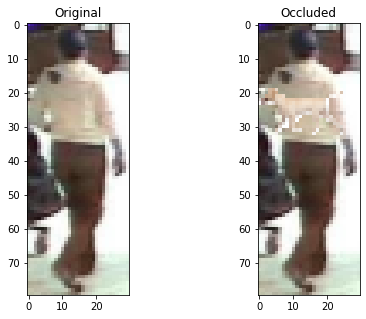

In [ ]:
occ = d.copy()
for im in range(0, 50):
  img=occ[im]
  if c==50:
    print('done')
    break
  c+=1
  print(c)
  

  s_img = cv2.imread(p)[:,:,::-1]
  s_img=s_img[78:360, 65:545,:]
  s_img = image_resize(s_img, width = 25)
  #s_img = image_resize(s_img, height = 30)
  #plt.imshow(s_img)
  l_img = img.copy()
  mask = cv2.imread('/content/mask.jpg')
  mask=mask[78:360, 65:545]
  mask = image_resize(mask, width = 25)
  #mask = image_resize(mask, height = 30)
  kernel = np.ones((2,2),np.uint8)
  mask = cv2.erode(mask, kernel,iterations = 1)

  #l_img[mask>0]=0 
  y_offset=random.choice(range(10, 66))
  x_offset=random.choice((0,5))
  l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]][mask>0] = 0
  #xx = l_img.copy()
  #xx[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]][mask>0] = -1
  l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] += s_img*(mask>0)

  #plt.imshow(l_img)
  #mask.shape


  v = np.array([img, l_img])
  ooo.append(v)
  plt.figure(figsize=(20,5))
  plt.subplot(1,5,1),plt.imshow(v[0]),plt.title("Original")
  plt.subplot(1,5,2),plt.imshow(v[1]),plt.title("Occluded")
  plt.show()

In [ ]:
len(ooo)

50

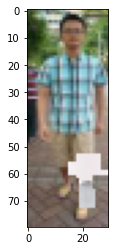

In [ ]:
plt.imshow(ooo[-1][1])

In [ ]:
fx = np.array(ooo)
fx.shape

(50, 2, 80, 30, 3)

In [ ]:
np.random.shuffle(fx)

In [ ]:
fx.shape

(50, 2, 80, 30, 3)

In [ ]:
np.save("/content/drive/MyDrive/Dataset/ilids.npy", fx)

In [ ]:
len(ooo)

872

In [ ]:
final_occ = np.array(ooo)

In [ ]:
final_occ.shape

(872, 5, 80, 30, 3)

In [ ]:
np.random.shuffle(final_occ)

In [ ]:
np.save('/content/drive/MyDrive/Dataset/syn_occ_sh.npy', final_occ)

In [ ]:
k=np.load('/content/drive/MyDrive/Dataset/f/final.npy')
k.shape

(5, 2, 80, 30, 3)

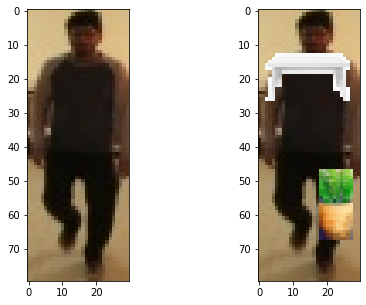

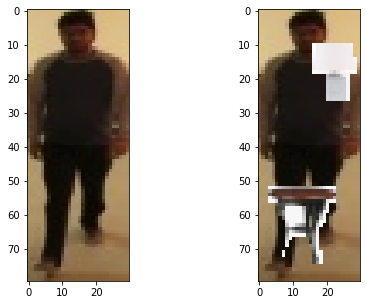

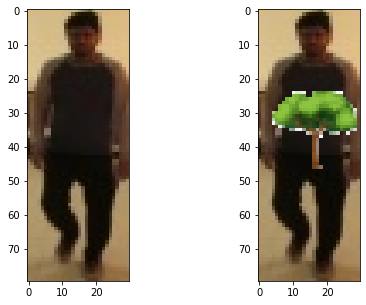

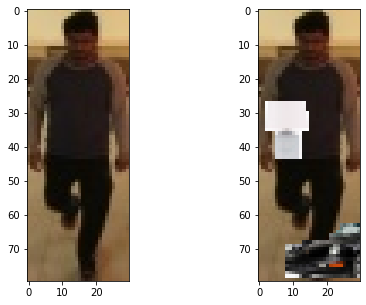

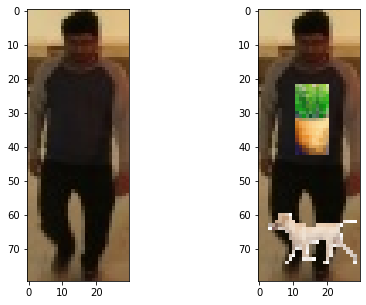

In [ ]:
l = 0
for img in k:
  l+=1
  plt.figure(figsize=(20, 5))
  plt.subplot(1, 5, 1),plt.imshow(img[0])
  plt.subplot(1, 5, 2),plt.imshow(img[1])
  #plt.subplot(1, 5, 3),plt.imshow(img[2])
  #plt.subplot(1, 5, 4),plt.imshow(img[3])
  #plt.subplot(1, 5, 5),plt.imshow(img[4])
  plt.show()